# Transfer Learning

This type of neural nets are predominantly (and heavily) used in image processing. This lesson is on the CIFAR-10 dataset.

## Useful terms:

1. Conv2D
2. MaxPool2D
3. BatchNormalization

## Further Readings:
https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

In [3]:
!pip install tqdm
!conda install -y Pillow

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /root/miniconda3:

The following NEW packages will be INSTALLED:

    jbig:    2.1-0        
    libtiff: 4.0.6-3      
    olefile: 0.44-py36_0  
    pillow:  4.2.1-py36_0 

The following packages will be UPDATED:

    conda:   4.3.21-py36_0 --> 4.3.22-py36_0

jbig-2.1-0.tar 100% |################################| Time: 0:00:00  12.19 MB/s
libtiff-4.0.6- 100% |################################| Time: 0:00:00  24.59 MB/s
olefile-0.44-p 100% |################################| Time: 0:00:00  34.37 MB/s
pillow-4.2.1-p 100% |################################| Time: 0:00:00  33.11 MB/s
conda-4.3.22-p 100% |################################| Time: 0:00:00  47.31 MB/s


In [120]:
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlretrieve
from os.path import isfile, isdir, getsize
from os import mkdir, makedirs
from tqdm import tqdm

import zipfile
import pickle

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil

%matplotlib inline

Download and extract the doge and cate pictures.

In [5]:
catdog_dataset_folder_path = 'catdog'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('catdog.zip'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Doge n Cate Dataset') as pbar:
        urlretrieve(
            'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip',
            'catdog.zip',
            pbar.hook)

if not isdir(catdog_dataset_folder_path):
    mkdir(catdog_dataset_folder_path)
    with zipfile.ZipFile('catdog.zip') as f:
        f.extractall('./'+catdog_dataset_folder_path)
        
        

Randomly choose 20000 images and moves them to training and the rest to testing folders

In [135]:
files = glob.glob(catdog_dataset_folder_path+'/PetImages/**/*.jpg')
labels = np.array([0]*12500+[1]*12500)

size = np.zeros(len(files))
for i,f in enumerate(files):
    size[i] = getsize(f)

In [136]:
idx = np.where(size==0)[0]
for i in idx:
    del files[i]
    np.delete(labels, i,0)

In [137]:
len(labels)

25000

In [138]:
len(files)

24998

In [134]:
labels

(25000,)

In [128]:
files[14395]

'catdog/PetImages/Dog/11702.jpg'

In [58]:


len_data = 25000
train_examples = 20000
test_examples = len_data - train_examples

# randomly choose 20000 as training and testing cases
permutation = np.random.permutation(25000)
train_set = [files[i] for i in permutation[:]]
test_set = [files[i] for i in permutation[-5000:]]
train_labels = labels[permutation[:20000]]
test_labels = labels[permutation[-5000:]]

train_folder = catdog_dataset_folder_path+'/train'
test_folder = catdog_dataset_folder_path+'/test'

if isdir(train_folder): #if directory already exists
    shutil.rmtree(train_folder)    
if isdir(test_folder): #if directory already exists
    shutil.rmtree(test_folder)    
makedirs(train_folder+'/cat/')
makedirs(train_folder+'/dog/')
makedirs(test_folder+'/cat/')
makedirs(test_folder+'/dog/')

for f,i in zip(train_set, train_labels):
    if i==0:
        shutil.copy2(f, train_folder+'/cat/')
    else:
        shutil.copy2(f, train_folder+'/dog/')
        
for f,i in zip(test_set, test_labels):
    if i==0:
        shutil.copy2(f, test_folder+'/cat/')
    else:
        shutil.copy2(f, test_folder+'/dog/')  

Found 20000 images belonging to 2 classes.


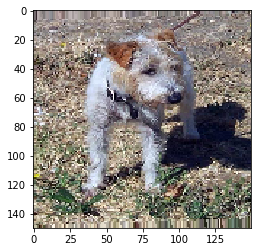

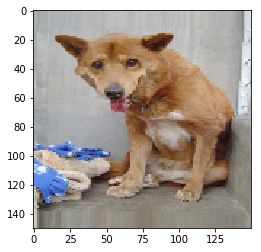

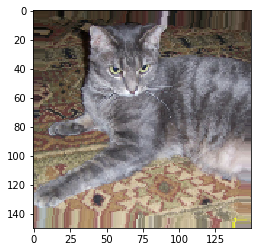

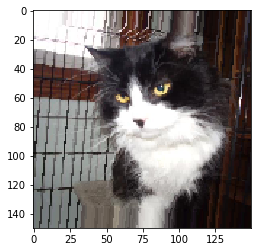

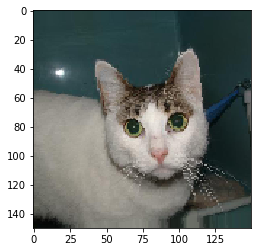

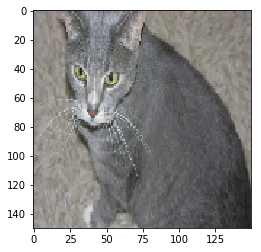

In [76]:
datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        zoom_range=0.2,
        horizontal_flip=True)

img_height = img_width = 150
channels = 3
train_generator = datagen.flow_from_directory(
    train_folder,
    color_mode = "rgb",
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode=None)

i = 0
img_list = []
for batch in train_generator: #.flow(x, batch_size=1)
    img_list.append(batch)
    i += 1
    if i > 5:
        break
        

for img in img_list:
    plt.imshow(np.squeeze(img))
    plt.show()        

## Basic logistic multiclass classification:

In [111]:
batch_size = 1000
train_generator = datagen.flow_from_directory(
    train_folder,
    color_mode = "rgb",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [87]:
x_train, y_train = next(train_generator)
x_test, y_test = next(train_generator)

/root/miniconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/root/miniconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/root/miniconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/root/miniconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/root/miniconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly c

In [93]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train.reshape(batch_size,-1), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
y_pred = logistic.predict(x_test.reshape(len(x_test), -1))
y_pred[:10]

array([ 1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.], dtype=float32)

Predicting the probabilities for the first 3 images:

In [101]:
logistic.predict_proba(x_test[:3].reshape(3,-1))

array([[ 0.14669659,  0.85330341],
       [ 0.97650613,  0.02349387],
       [ 0.05101486,  0.94898514]])

Accuracy of the predictions:

In [98]:
np.count_nonzero(y_pred == y_test)/len(y_test)

0.536

## Convolution Neural Networks (CNN)

** Points to note **
1. One CNN, connected to **one** node above is simply a Dense layer with most weights set to zero.
2. The same CNN, connected to multiple nodes is weight tying/ sharing.

Consider the following convolution mask:
<img src='https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-24-pm.png?w=74&h=64'>
<img src='https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=536&h=392'>

![](cnn.png)

### Using the max pooling layer:

In [ ]:
Conv2D?

In [ ]:
MaxPool2D?

In [117]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3,3), padding='same', input_shape = (img_width,img_height,channels)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(16, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 8)       224       
_________________________________________________________________
activation_10 (Activation)   (None, 150, 150, 8)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
batch_normalization_7 (Batch (None, 50, 50, 16)        64        
_________________________________________________________________
activation_11 (Activation)   (None, 50, 50, 16)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 16)        0         
__________

In [119]:
batch_size = 256
train_generator = datagen.flow_from_directory(
    train_folder,
    color_mode = "rgb",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')
model.fit_generator(train_generator, train_examples//batch_size, epochs=5)

Found 20000 images belonging to 2 classes.
Epoch 1/5
 5/78 [>.............................] - ETA: 372s - loss: 0.8611 - acc: 0.5039

/root/miniconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/root/miniconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/root/miniconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/root/miniconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/root/miniconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Pos

29/78 [==========>...................] - ETA: 270s - loss: 0.7571 - acc: 0.5506

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/root/miniconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/root/miniconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/root/miniconda3/lib/python3.6/site-packages/keras/engine/training.py", line 606, in data_generator_task
    generator_output = next(self._generator)
  File "/root/miniconda3/lib/python3.6/site-packages/keras/preprocessing/image.py", line 727, in __next__
    return self.next(*args, **kwargs)
  File "/root/miniconda3/lib/python3.6/site-packages/keras/preprocessing/image.py", line 960, in next
    target_size=self.target_size)
  File "/root/miniconda3/lib/python3.6/site-packages/keras/preprocessing/image.py", line 320, in load_img
    img = pil_image.open(path)
  File "/root/miniconda3/lib/python3.6/site-packages/PIL/Image.py", line 2519, in open
    % (filename if filename else fp))
OSError: cannot ide

ValueError: output of generator should be a tuple `(x, y, sample_weight)` or `(x, y)`. Found: None

In [ ]:
y_pred = model.predict_classes(test_x)
np.count_nonzero(y_pred == test_y)/len(test_y)

In [ ]:
plt.figure(figsize=(12,12))
idx = np.random.choice(len(test_x),5,replace=False)


p = model.predict(test_x[idx])
for i in range(len(idx)):
    plt.subplot(5,2,2*i+1)
    plt.imshow(test_x[idx[i]])
    plt.title(label_dict[test_y[idx[i]]])
#     plt.show()
    pred_label = np.argsort(-p[i])[:3]
    pred_prob = [p[i][l] for l in pred_label]
    pred_label = [label_dict[l] for l in pred_label]
    
    plt.subplot(5,2,2*i+2)
    plt.bar(range(3),pred_prob)
    plt.xticks(range(3), pred_label)
#     plt.show()

plt.show()

## Batch Normalization

Batch Normalization makes the output of multiplying by weights 0 mean and variance of one **before** passing through an activation layer. This makes sure that the gradients are neither large or too small. Making the learning process faster. 

https://www.quora.com/Why-does-batch-normalization-help

In [ ]:
BatchNormalization?

In [ ]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3,3), padding='same', input_shape = (width,height,channels)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3,3), padding='same'))
# TODO: add a BatchNormalization() layer
model.add(Activation('relu'))
# TODO: add a MaxPool2D layer
# TODO: Add another set of Conv2D followed by BatchNormalization, followed by relu activation, followed by maxpool (4 lines of code)
# TODO: flatten the layer
# TODO: Add the last softmax layer
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
batch_size = 256
model.fit_generator(get_batch(batch_size=batch_size), train_examples//batch_size, epochs=5)

In [ ]:
y_pred = model.predict_classes(test_x)
np.count_nonzero(y_pred == test_y)/len(test_y)

In [ ]:
plt.figure(figsize=(12,12))
idx = np.random.choice(len(test_x),5,replace=False)


p = model.predict(test_x[idx])
for i in range(len(idx)):
    plt.subplot(5,2,2*i+1)
    plt.imshow(test_x[idx[i]])
    plt.title(label_dict[test_y[idx[i]]])
#     plt.show()
    pred_label = np.argsort(-p[i])[:3]
    pred_prob = [p[i][l] for l in pred_label]
    pred_label = [label_dict[l] for l in pred_label]
    
    plt.subplot(5,2,2*i+2)
    plt.bar(range(3),pred_prob)
    plt.xticks(range(3), pred_label)
#     plt.show()

plt.show()